## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
from sklearn.model_selection import GridSearchCV,cross_val_score
import joblib

## Data loading

In [2]:
df = pd.read_csv('airline.csv', index_col='Unnamed: 0')
df.head(4)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied


In [3]:
df1 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,25976.0,65005.657992,37611.526647,17.0,32170.5,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.00,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.00,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.00,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.00,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.00,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.00,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.00,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.00,5.0
Seat comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.00,5.0


### Dataset description

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Exploratory Data Analysis (EDA)

In [6]:
warnings.filterwarnings('ignore')

In [7]:
satisf = df.groupby(['satisfaction'])[['satisfaction']].count()
satisf

,satisfaction
satisfaction,
neutral or dissatisfied,14573
satisfied,11403


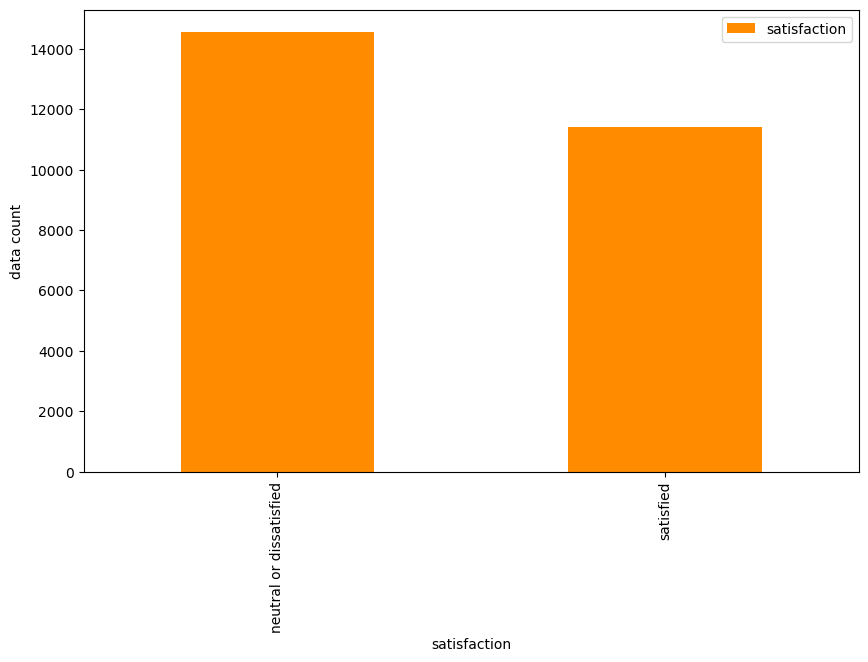

In [8]:
satisf.plot(kind='bar', figsize=(10,6), color='darkorange')
plt.xlabel('satisfaction')
plt.ylabel('data count')
plt.show()

In [9]:
wifi=df[['Inflight wifi service']].groupby(['Inflight wifi service']).size().sort_values(ascending=False).reset_index()
wifi

,Inflight wifi service,0
0,2,6490
1,3,6317
2,4,4981
3,1,4488
4,5,2887
5,0,813


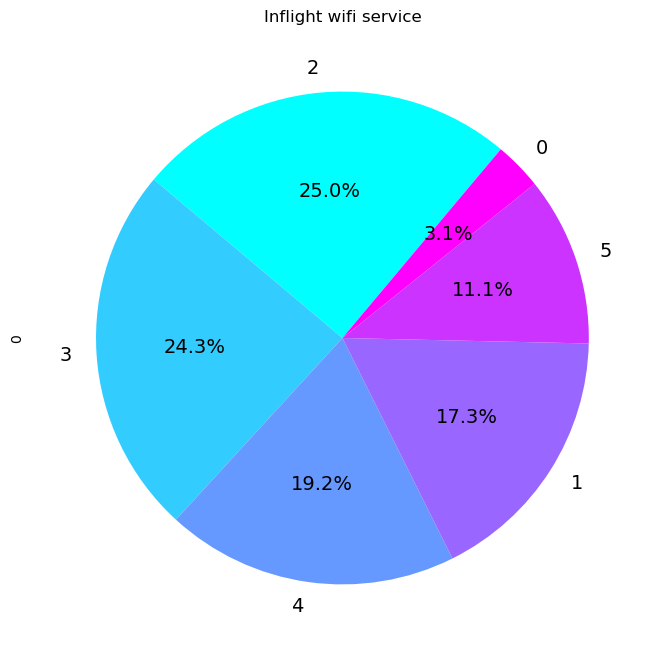

In [10]:
wifi.plot(kind='pie',y=0, autopct='%1.1f%%',  title = "Inflight wifi service",
startangle=50, shadow=False, cmap='cool', labels=wifi['Inflight wifi service'], legend = False, fontsize=14, figsize=(8, 8))

plt.show()

In [11]:
convenient = df.groupby(['Departure/Arrival time convenient'])[['Departure/Arrival time convenient']].count()

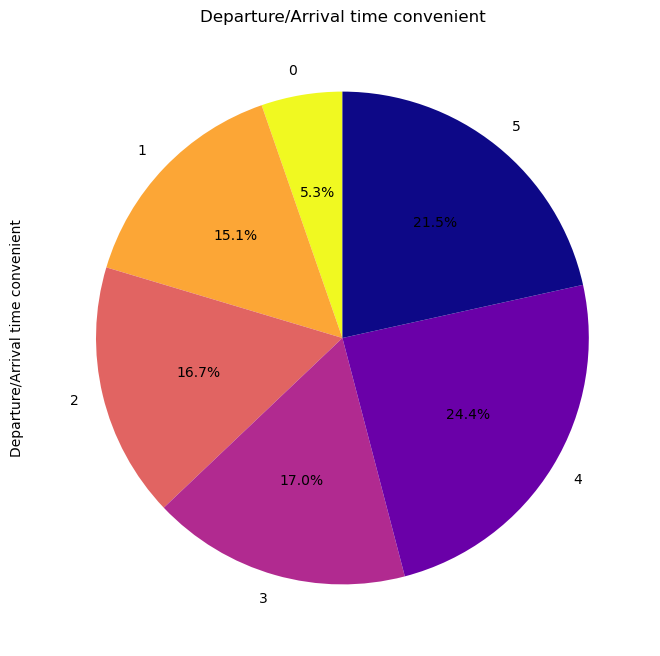

In [12]:
convenient.plot(kind='pie',y=0, autopct='%1.1f%%', startangle=90, shadow=False, legend= False, figsize=(8, 8), cmap='plasma_r')      
plt.title('Departure/Arrival time convenient')

plt.show()

In [13]:
booking = df.groupby(['Ease of Online booking'])[['Ease of Online booking']].count()

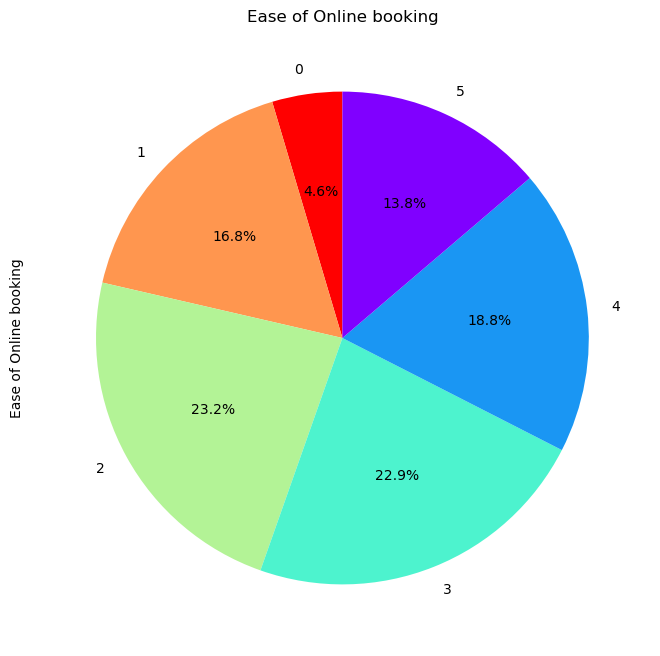

In [14]:
booking.plot(kind='pie',y=0, autopct='%1.1f%%', startangle=90, shadow=False, legend= False, figsize=(8, 8), cmap='rainbow_r')      
plt.title('Ease of Online booking')

plt.show()

In [15]:
gate = df.groupby(['Gate location'])[['Gate location']].count()
food = df.groupby(['Food and drink'])[['Food and drink']].count()
boarding = df.groupby(['Online boarding'])[['Online boarding']].count()
clean = df.groupby(['Cleanliness'])[['Cleanliness']].count()

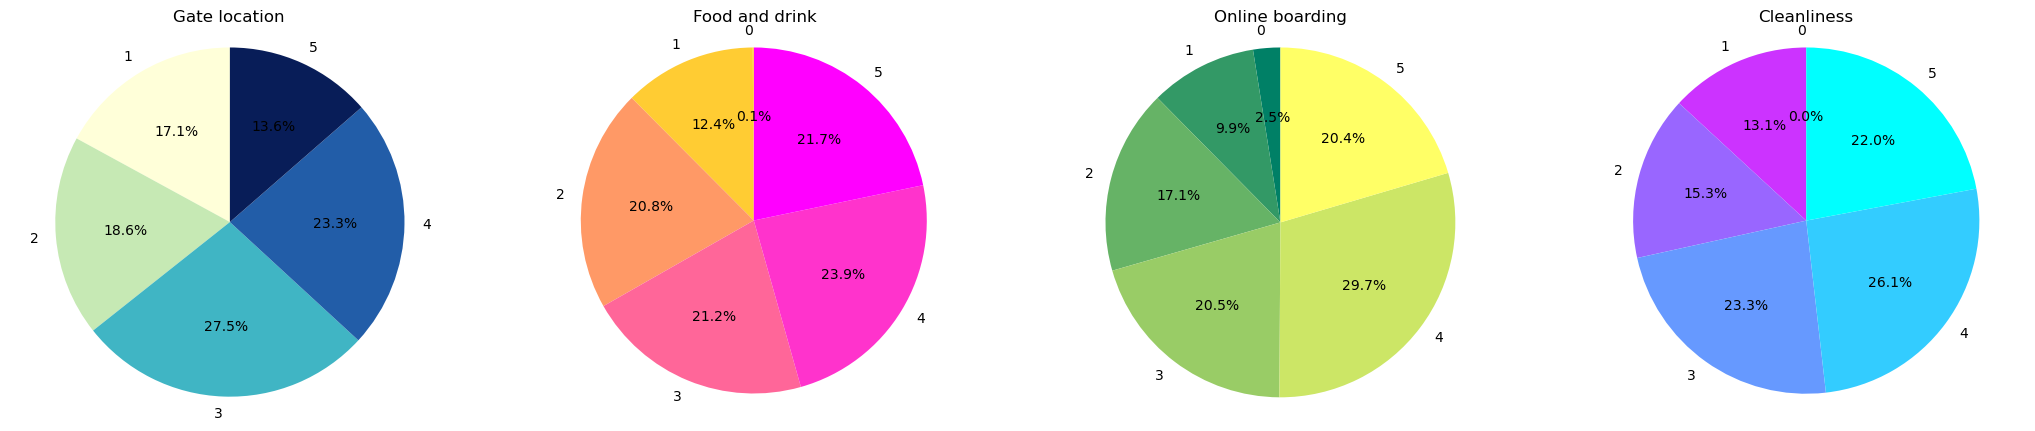

In [16]:
plt.figure(figsize=(26, 5))

plt.subplot(1,4,1)
gate.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='YlGnBu')      
plt.title('Gate location')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,2)
food.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='spring_r')      
plt.title('Food and drink')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,3)
boarding.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='summer')      
plt.title('Online boarding')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,4)
clean.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='cool_r')      
plt.title('Cleanliness')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [17]:
seat = df.groupby(['Seat comfort'])[['Seat comfort']].count()
entertaiment = df.groupby(['Inflight entertainment'])[['Inflight entertainment']].count()
on_board = df.groupby(['On-board service'])[['On-board service']].count()

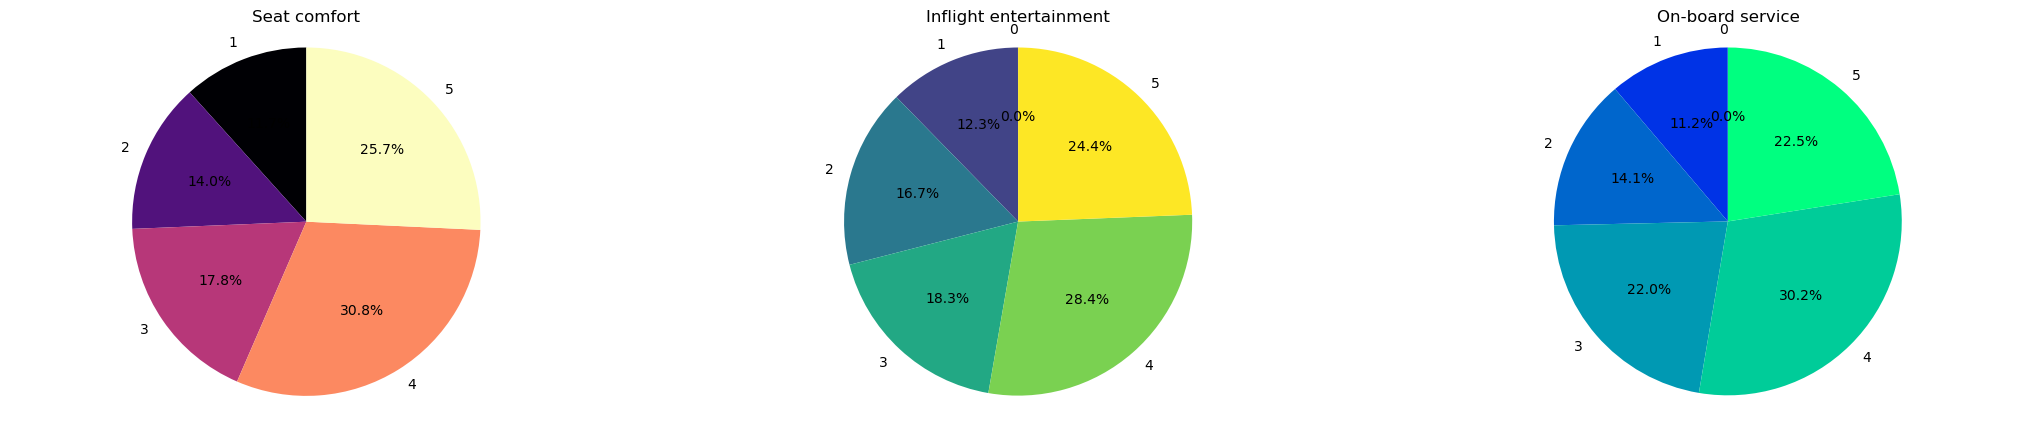

In [18]:
plt.figure(figsize=(26, 5))

plt.subplot(1,3,1)
seat.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='magma')      
plt.title('Seat comfort')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,3,2)
entertaiment.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='viridis')      
plt.title('Inflight entertainment')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,3,3)
on_board.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='winter')      
plt.title('On-board service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [19]:
leg = df.groupby(['Leg room service'])[['Leg room service']].count()
bagage = df.groupby(['Baggage handling'])[['Baggage handling']].count()
checkin = df.groupby(['Checkin service'])[['Checkin service']].count()
inflight = df.groupby(['Inflight service'])[['Inflight service']].count()

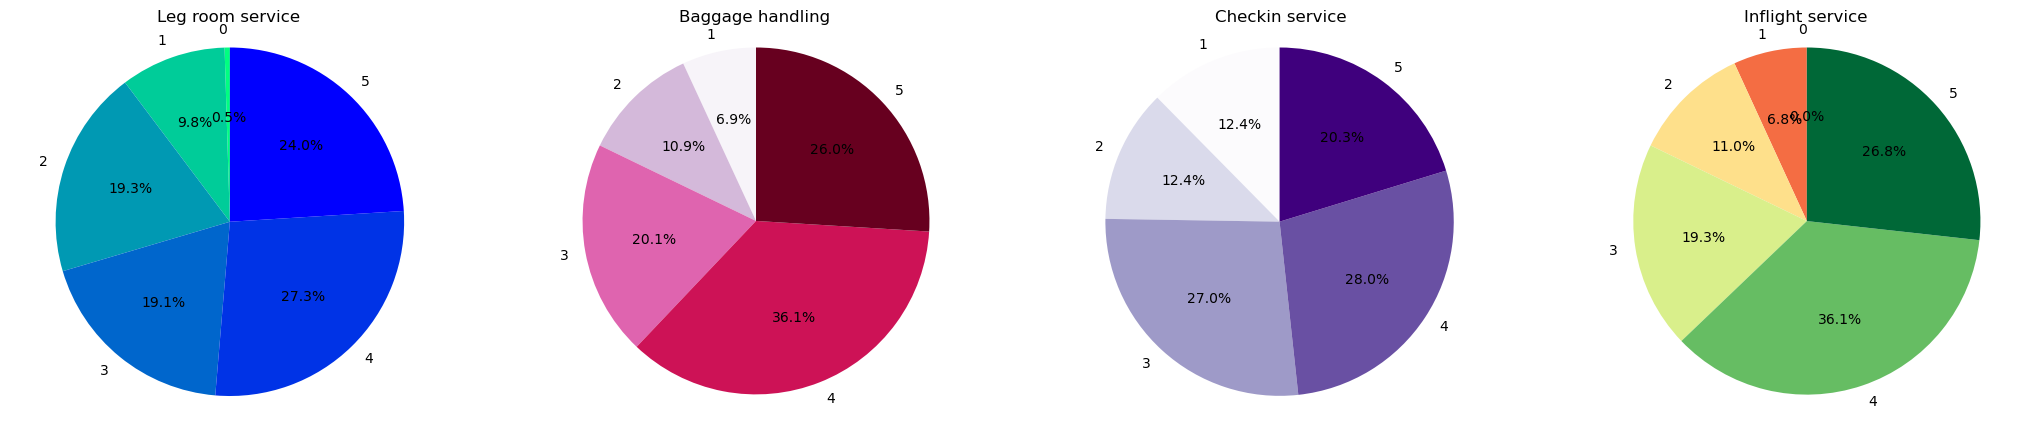

In [20]:
plt.figure(figsize=(26, 5))

plt.subplot(1,4,1)
leg.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='winter_r')      
plt.title('Leg room service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,2)
bagage.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='PuRd')      
plt.title('Baggage handling')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,3)
checkin.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='Purples')      
plt.title('Checkin service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.subplot(1,4,4)
inflight.iloc[:,0].plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False, cmap='RdYlGn')      
plt.title('Inflight service')
plt.ylabel('')
plt.axis('equal') # Sets the pie chart to look like a circle.


plt.show()

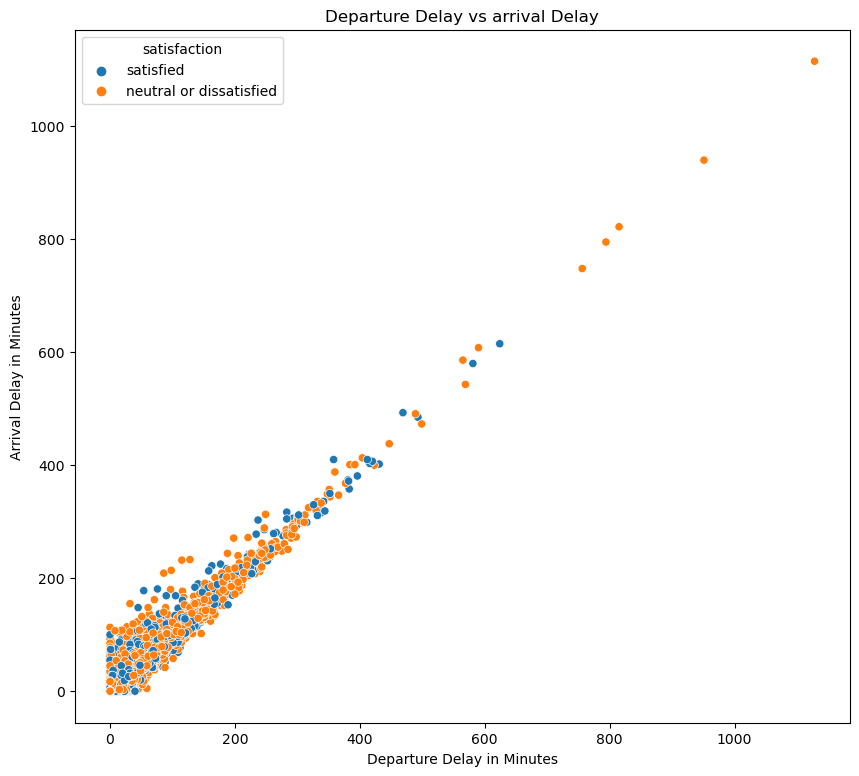

In [21]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue = 'satisfaction', data=df)
plt.title('Departure Delay vs arrival Delay')
plt.show()

## Data preprocessing

### Dataset splitting 

In [22]:
df1 = df.copy()

In [23]:
df1.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [24]:
median = df1['Arrival Delay in Minutes'].median()
df1['Arrival Delay in Minutes'].fillna(median, inplace=True)

In [25]:
X = df1.drop('satisfaction', axis=1)
y = df1['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20780, 23), (5196, 23), (20780,), (5196,))

## Handling outliers

In [26]:
def diagnostic_plot(X_train, variable):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    sns.histplot(X_train[variable], bins=25)
    plt.title('Histogram')
    
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')
    
    plt.show()
    
    print('skewness: ', X_train[variable].skew())
    if (X_train[variable].skew() >= -0.5) | (X_train[variable].skew() <= 0.5):
        print('The distribution is skewed')
    else:
        print('the distribution is normal')

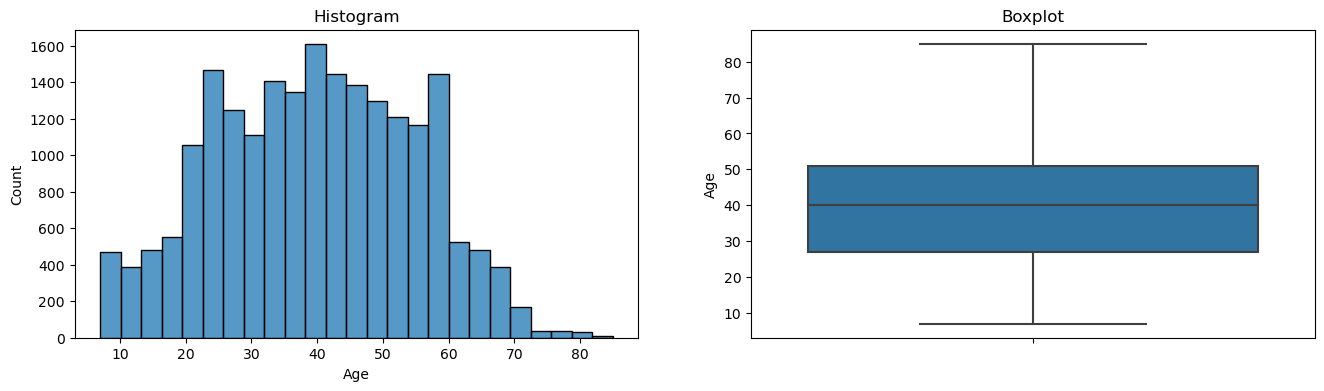

skewness:  -0.001437915978268951
The distribution is skewed


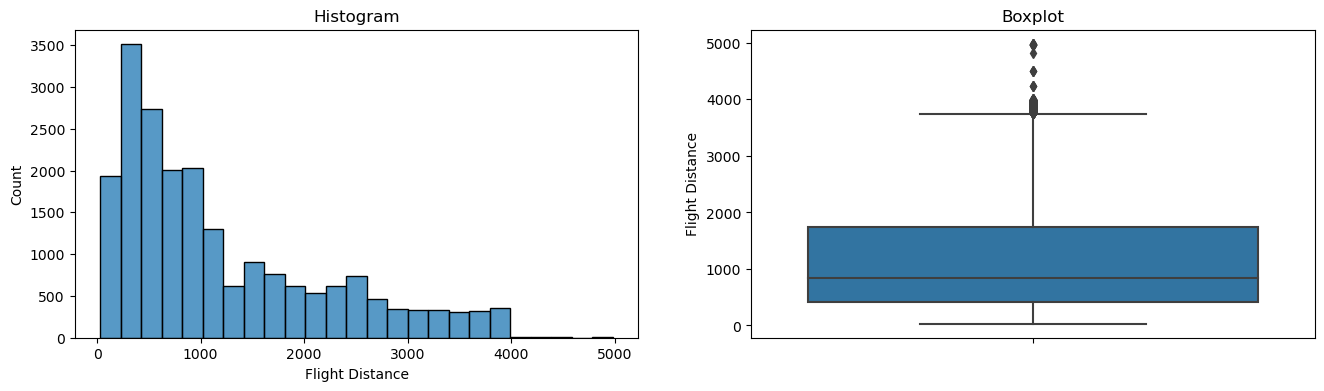

skewness:  1.1000562380810461
The distribution is skewed


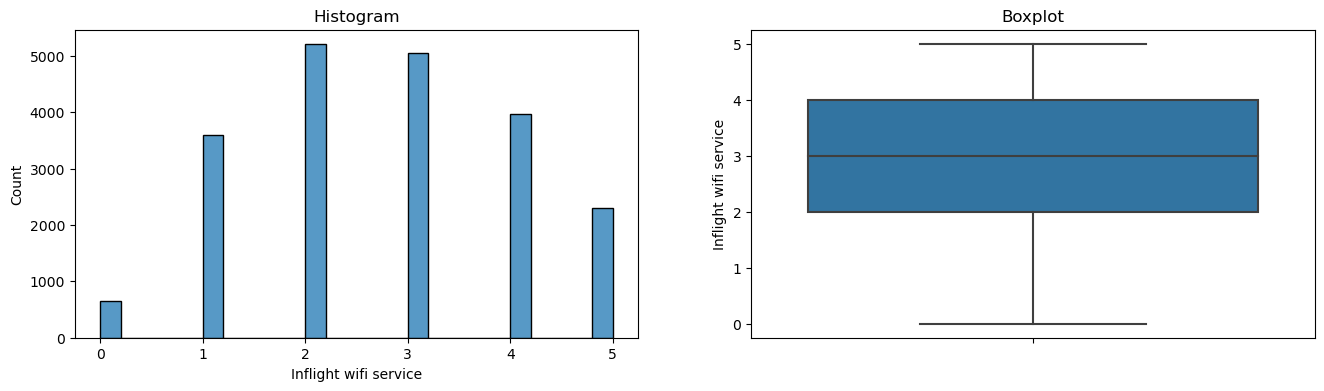

skewness:  0.04283075691077188
The distribution is skewed


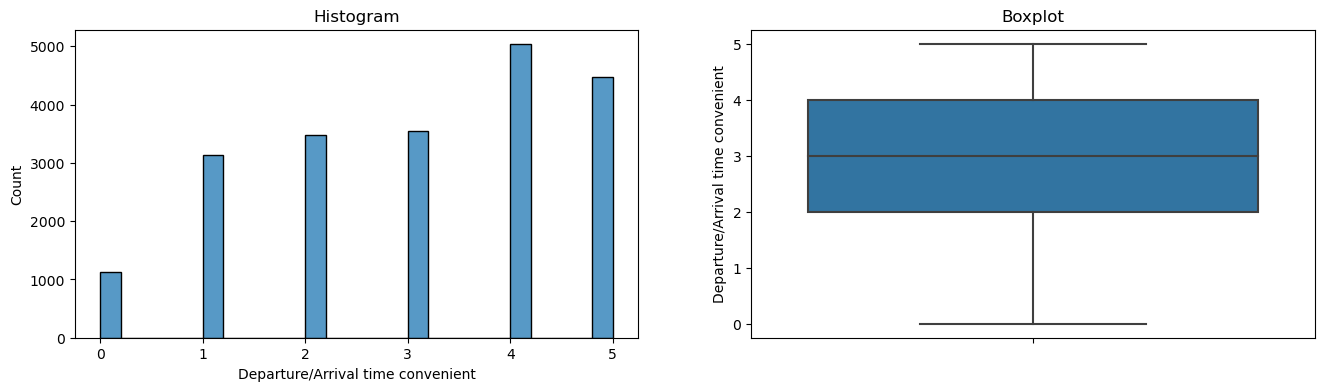

skewness:  -0.3221234730505185
The distribution is skewed


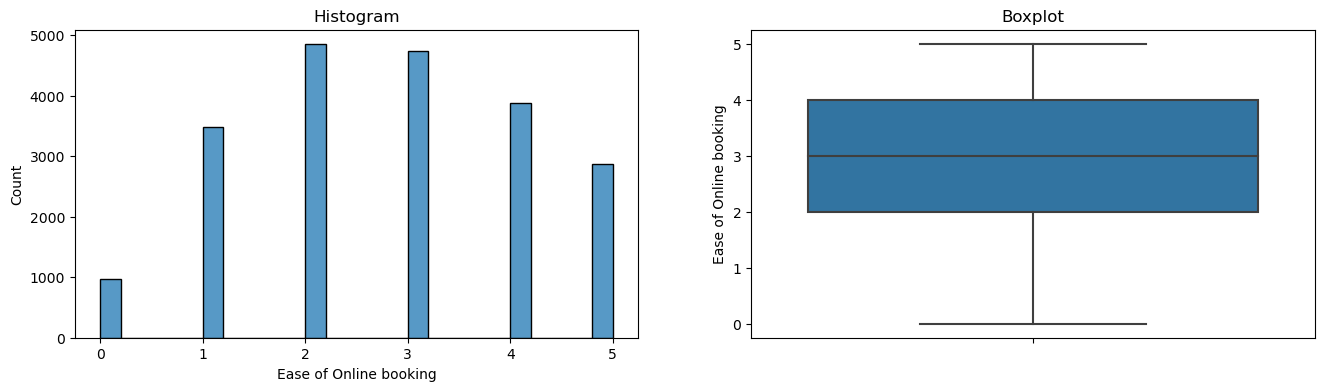

skewness:  -0.019097367389022662
The distribution is skewed


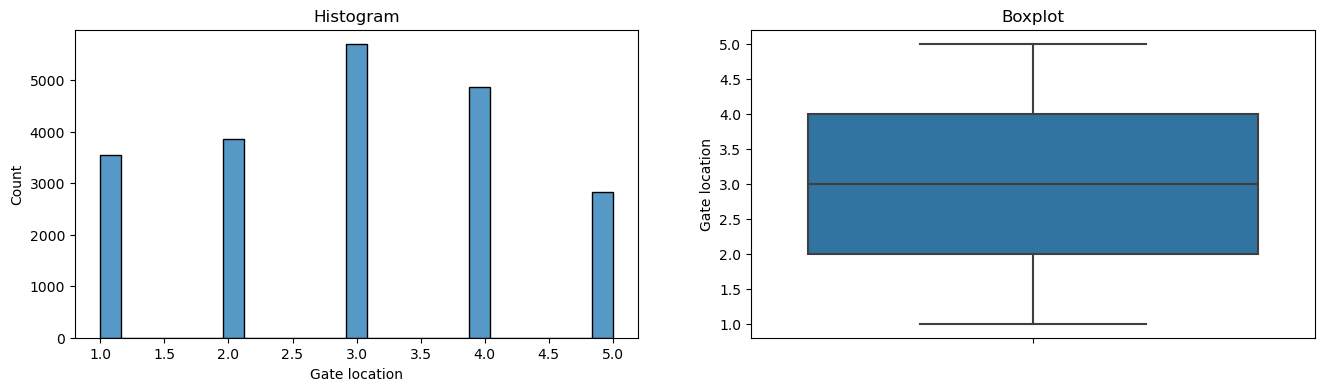

skewness:  -0.05924622258681433
The distribution is skewed


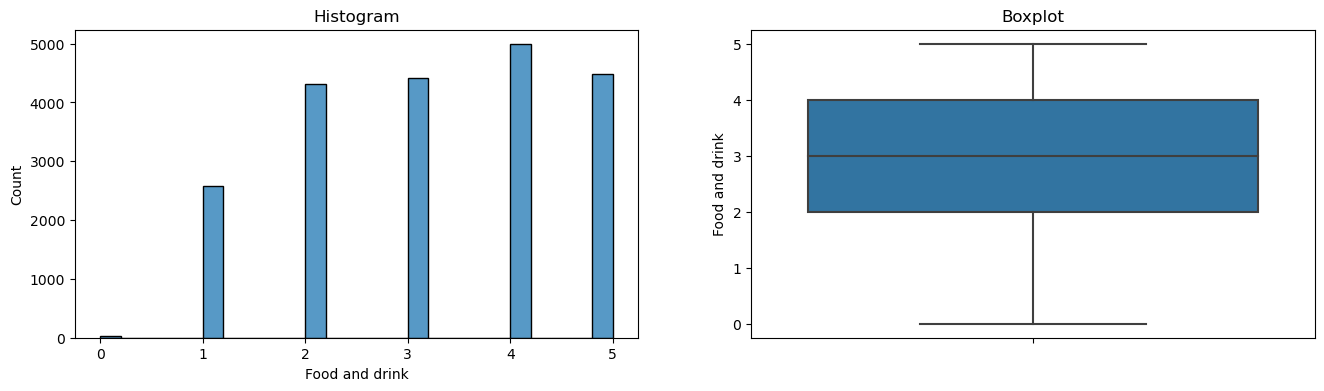

skewness:  -0.1711032368721245
The distribution is skewed


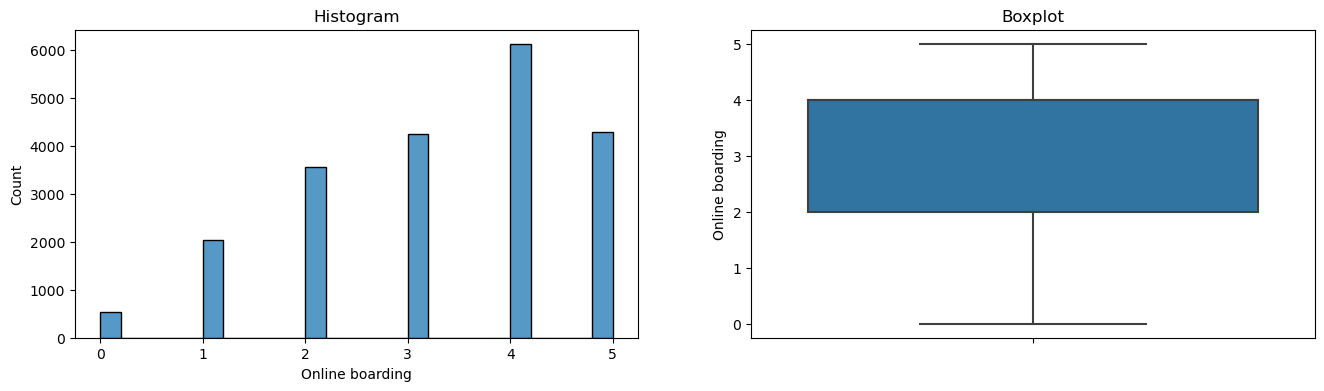

skewness:  -0.46994101945607997
The distribution is skewed


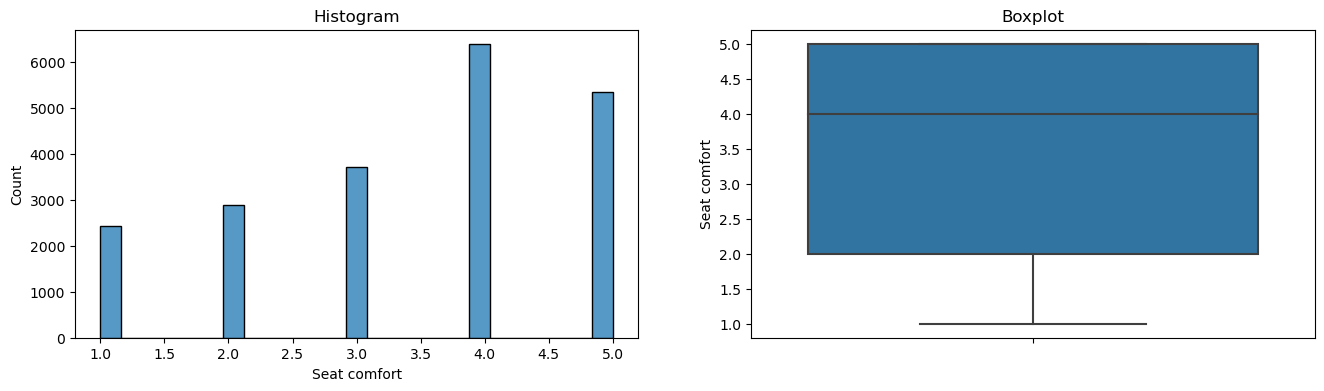

skewness:  -0.4966766075864142
The distribution is skewed


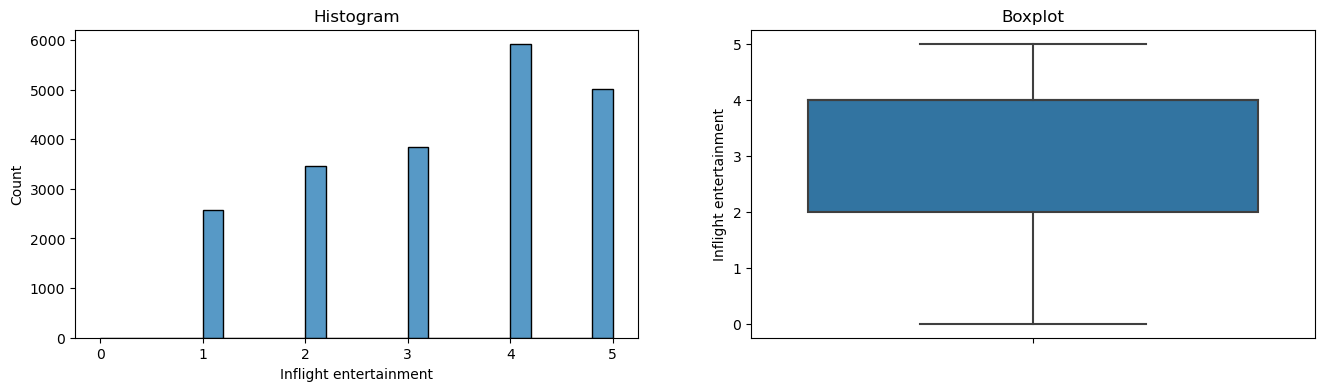

skewness:  -0.3679514133481261
The distribution is skewed


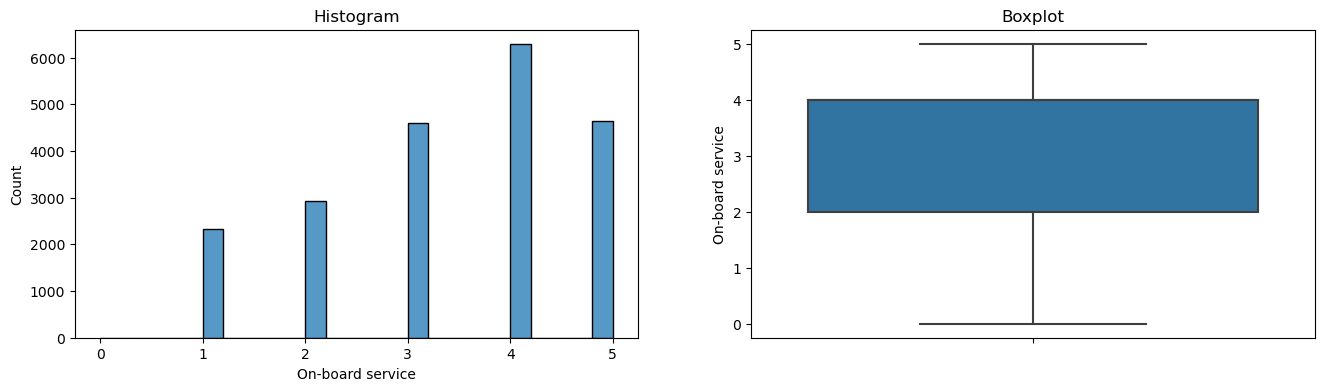

skewness:  -0.42525227884295624
The distribution is skewed


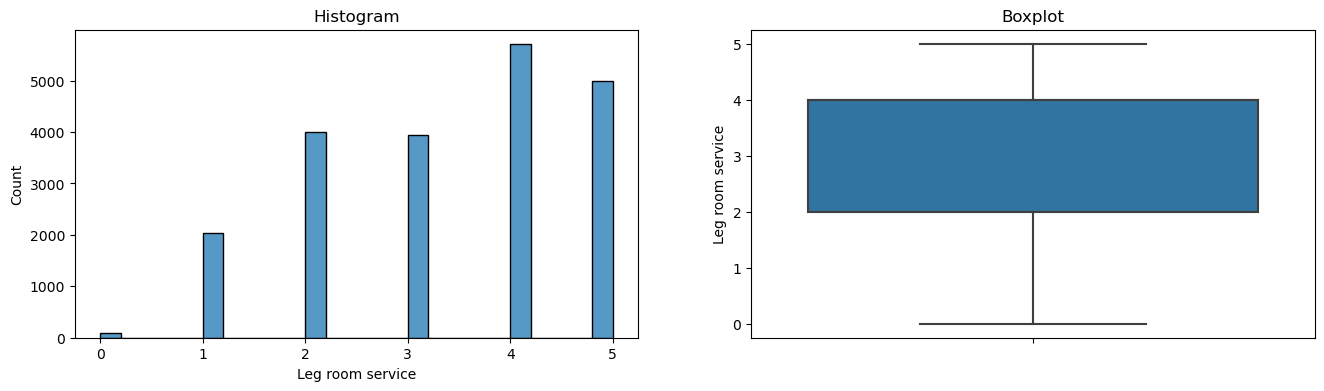

skewness:  -0.3452104475546791
The distribution is skewed


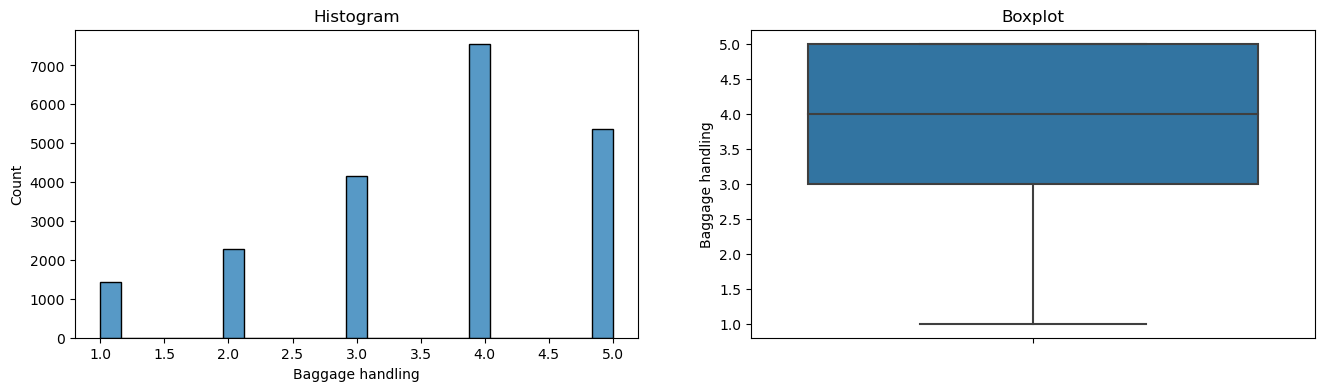

skewness:  -0.6774521894190129
The distribution is skewed


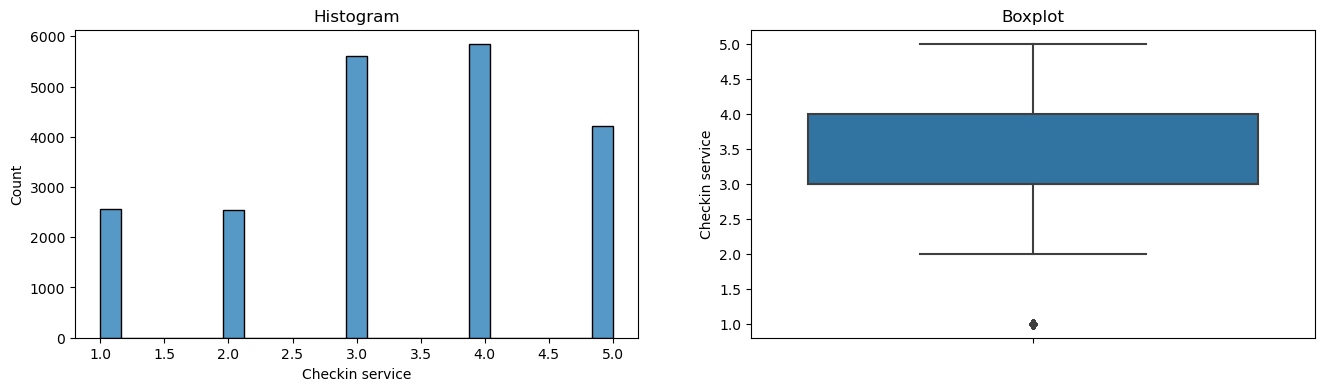

skewness:  -0.37611082687131814
The distribution is skewed


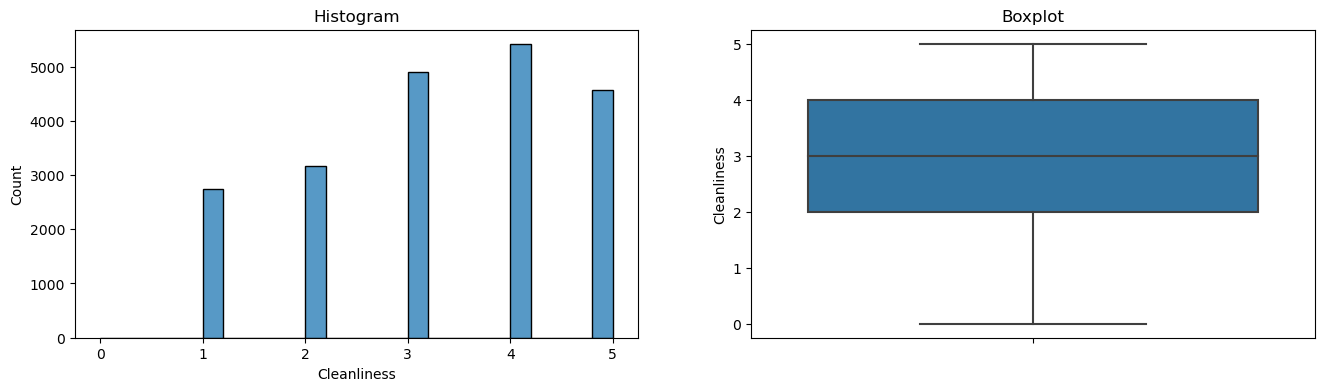

skewness:  -0.3033194030339402
The distribution is skewed


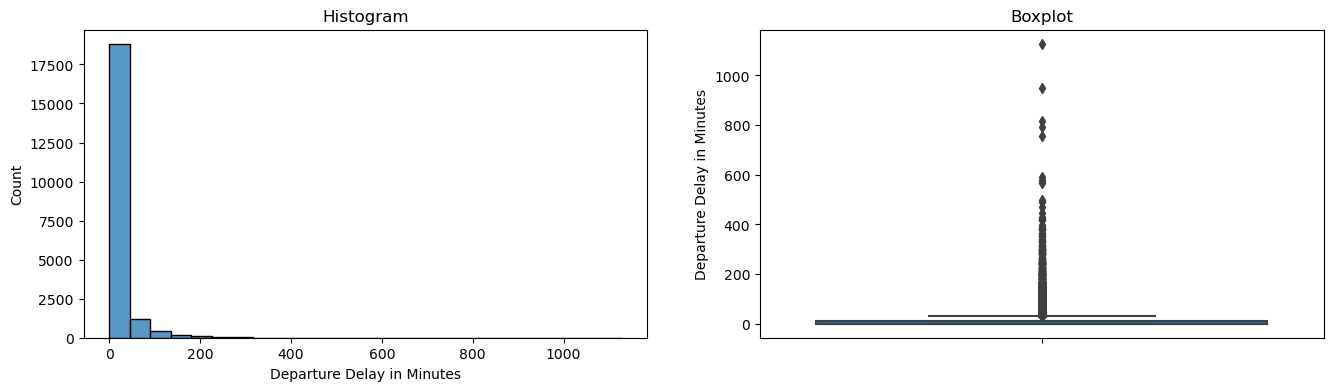

skewness:  7.4197241000751415
The distribution is skewed


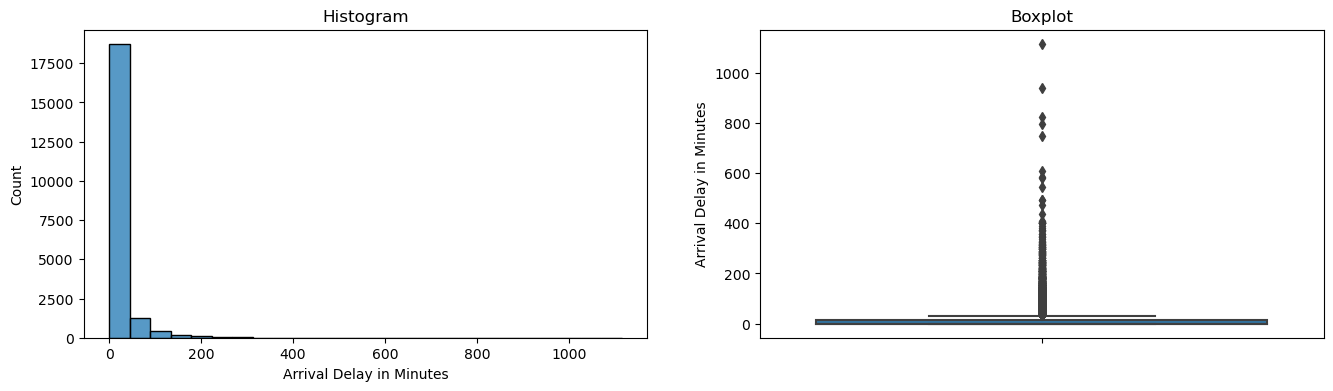

skewness:  7.218087708483621
The distribution is skewed


In [27]:
diagnostic_plot(X_train, 'Age')
diagnostic_plot(X_train, 'Flight Distance')
diagnostic_plot(X_train, 'Inflight wifi service')
diagnostic_plot(X_train, 'Departure/Arrival time convenient')
diagnostic_plot(X_train, 'Ease of Online booking')
diagnostic_plot(X_train, 'Gate location')
diagnostic_plot(X_train, 'Food and drink')
diagnostic_plot(X_train, 'Online boarding')
diagnostic_plot(X_train, 'Seat comfort')
diagnostic_plot(X_train, 'Inflight entertainment')
diagnostic_plot(X_train, 'On-board service')
diagnostic_plot(X_train, 'Leg room service')
diagnostic_plot(X_train, 'Baggage handling')
diagnostic_plot(X_train, 'Checkin service')
diagnostic_plot(X_train, 'Cleanliness')
diagnostic_plot(X_train, 'Departure Delay in Minutes')
diagnostic_plot(X_train, 'Arrival Delay in Minutes')

## Feature selction

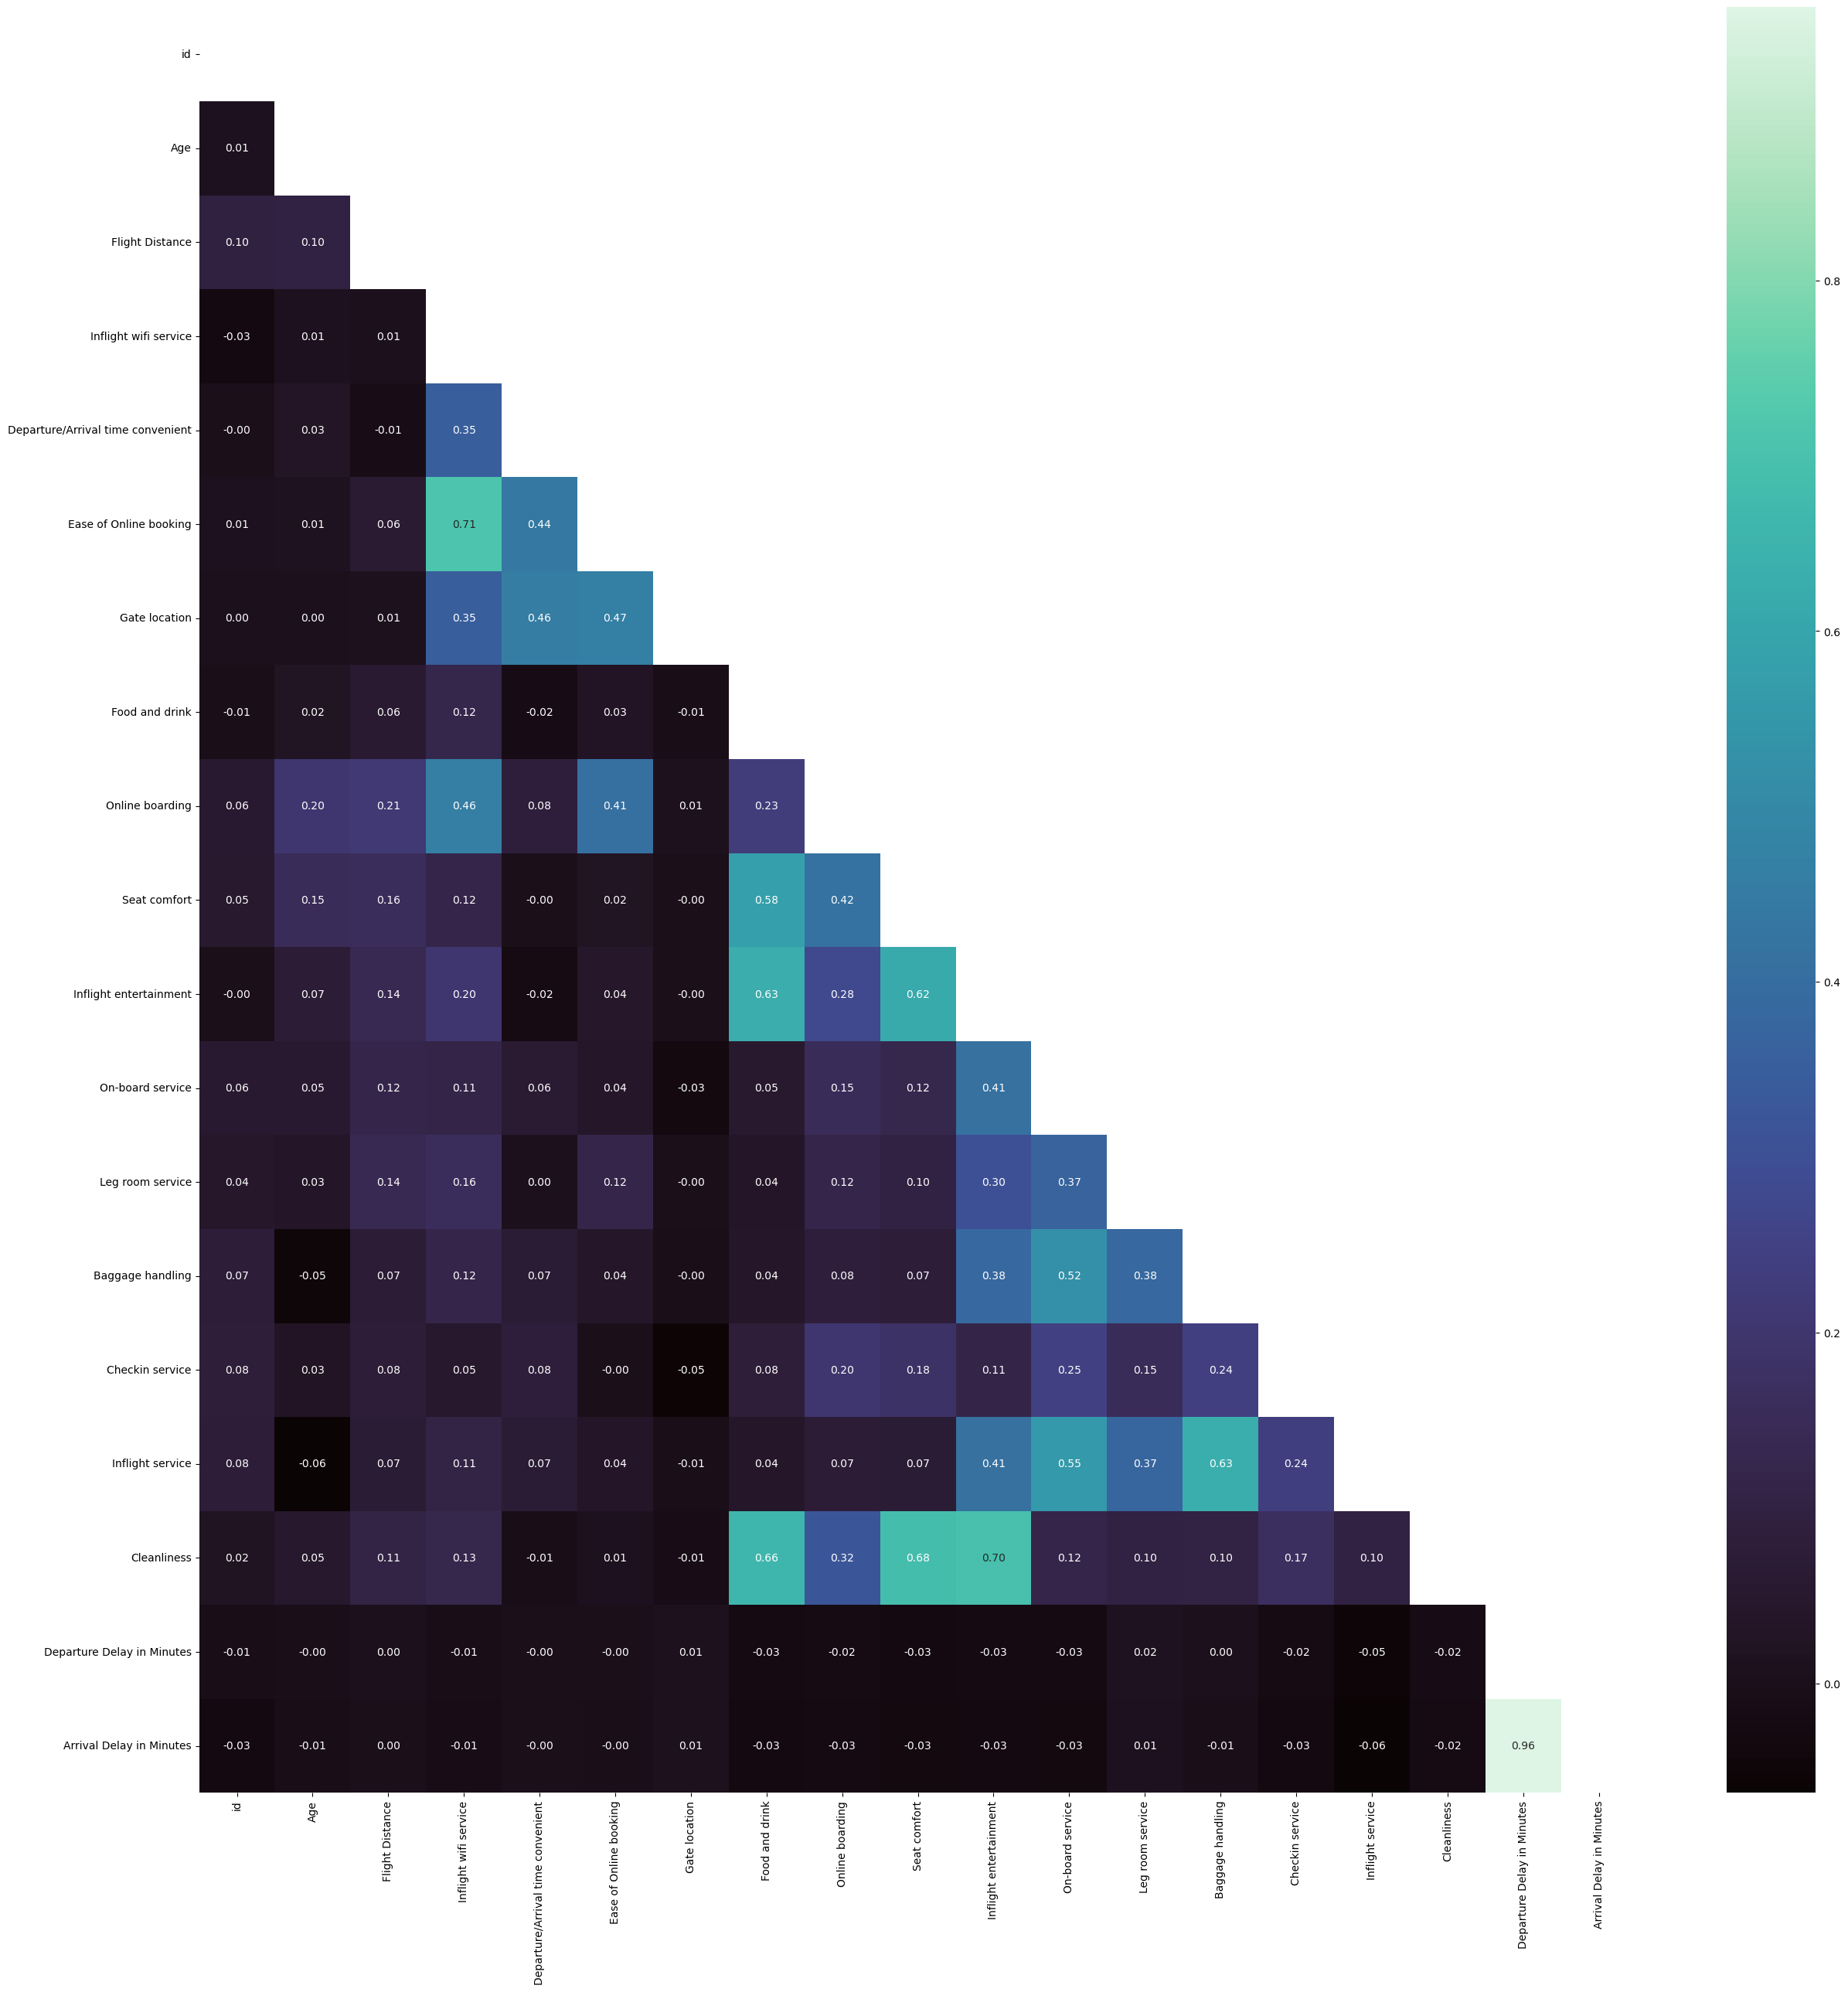

In [28]:
plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(df1.corr()))
sns.heatmap(df1.corr(), mask=mask, annot=True, fmt='.2f', cmap='mako')
plt.show()

In [29]:
cat = ['Gender', 'Customer Type', 'Type of Travel','Class']
X_train1 = pd.get_dummies(X_train, columns=cat, drop_first=True)
X_train1.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
10324,33736,68,667,0,4,0,2,5,5,4,...,3,2,3,0,0.0,0,0,1,1,0
9946,72408,29,985,3,3,3,3,4,3,4,...,5,5,4,2,0.0,1,1,0,0,0
10052,57756,29,2704,2,2,3,2,4,4,4,...,4,3,4,2,9.0,1,0,0,0,0
3511,91871,9,2239,1,5,1,1,1,1,1,...,5,5,1,0,0.0,0,0,1,1,0
21934,54201,18,1504,0,4,0,1,3,0,3,...,3,4,3,0,0.0,1,0,1,1,0


In [30]:
featimpt = RandomForestClassifier(n_estimators=21, random_state=69)

featimpt.fit(X_train1, y_train)

scorepercolumn = pd.Series(featimpt.feature_importances_, index=X_train1.columns)
scorepercolumn.sort_values(ascending=False)


Inflight wifi service                0.138760
Online boarding                      0.132545
Type of Travel_Personal Travel       0.100794
Class_Eco                            0.072432
Leg room service                     0.056224
Inflight entertainment               0.055335
Seat comfort                         0.044454
Flight Distance                      0.041474
Ease of Online booking               0.039524
Age                                  0.032039
On-board service                     0.030892
Customer Type_disloyal Customer      0.030485
id                                   0.030039
Cleanliness                          0.029594
Baggage handling                     0.028055
Checkin service                      0.027795
Departure/Arrival time convenient    0.022645
Inflight service                     0.020759
Gate location                        0.017382
Food and drink                       0.015641
Arrival Delay in Minutes             0.012144
Departure Delay in Minutes        

In [31]:
X_train.drop(['Gender', 'id'], axis=1, inplace=True)
X_test.drop(['Gender', 'id'], axis=1, inplace=True)

### Splitting between Numerical columns and categorical columns

In [32]:
num_columns =['Flight Distance', 'Age'] 
cat_columns =['Customer Type', 'Type of Travel','Class',  'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking','Gate location','Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']

In [33]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Target encoding

In [34]:
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [35]:
labelencoder.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [36]:
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)

In [37]:
y_train_enc = pd.DataFrame(y_train_encoded, columns=['satisfaction'])
y_test_enc = pd.DataFrame(y_test_encoded, columns=['satisfaction'])

In [38]:
y_test_enc.head()

,satisfaction
0,0
1,1
2,0
3,1
4,0


In [39]:
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

In [40]:
X_test_final.head()

,Flight Distance,Age,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
13047,404,20,disloyal Customer,Business travel,Eco Plus,2,2,2,4,3,2,3,3,4,4,4,3,4,3
14975,1627,51,Loyal Customer,Business travel,Business,1,1,1,1,2,4,5,4,4,4,5,5,4,2
12642,1012,41,Loyal Customer,Business travel,Eco,3,5,5,5,3,3,3,3,3,5,3,2,4,3
23011,3985,49,Loyal Customer,Business travel,Business,3,3,3,3,5,4,5,4,4,5,4,4,4,4
13308,1067,23,Loyal Customer,Personal Travel,Eco,3,4,2,2,3,2,3,3,4,2,4,3,4,3


## Make baseline

In [41]:
from lazypredict.Supervised import LazyClassifier

In [42]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_final, X_test_final, y_train_enc ,y_test_enc)
models

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [05:07<00:02,  2.39s/it]

[LightGBM] [Info] Number of positive: 9152, number of negative: 11628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 20780, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440423 -> initscore=-0.239444
[LightGBM] [Info] Start training from score -0.239444


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:08<00:00, 10.64s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.96,0.96,0.96,1.08
XGBClassifier,0.96,0.95,0.95,0.96,0.34
RandomForestClassifier,0.95,0.95,0.95,0.95,1.84
ExtraTreesClassifier,0.95,0.95,0.95,0.95,1.47
BaggingClassifier,0.95,0.95,0.95,0.95,0.58
SVC,0.94,0.94,0.94,0.94,6.31
DecisionTreeClassifier,0.93,0.93,0.93,0.94,0.13
AdaBoostClassifier,0.92,0.92,0.92,0.92,0.91
KNeighborsClassifier,0.92,0.92,0.92,0.92,0.43


## Model definition

In [43]:
num_skew = ['Flight Distance']
num_normal = ['Age']
cat_ord = ['Customer Type','Type of Travel','Class']
cat_none = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking','Gate location','Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']

In [44]:
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(), num_skew),
    ('numnormal', StandardScaler(), num_normal),
    ('catord', OrdinalEncoder(), cat_ord),
    ('catnone', 'passthrough', cat_none)
])

In [45]:
premod_RF = Pipeline([
    ('preprop', preprocess),
    ('RF', RandomForestClassifier())
])

## Model evaluation

### Hyperparameter tuning

In [46]:
param_gridRF = [{
    'RF__n_estimators' : [100, 200],
    'RF__max_features' : ['sqrt'],
    'RF__max_depth' : [ 4, 6, 8],
    'RF__min_samples_split': [2, 5, 8],
    'RF__min_samples_leaf' : [1, 2, 3],
    'RF__criterion' : ['entropy', 'gini']
}]

In [47]:
gridRF = GridSearchCV(premod_RF, param_gridRF, cv=5)
gridRF.fit(X_train_final, y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['Flight '
                                                                          'Distance']),
                                                                        ('numnormal',
                                                                         StandardScaler(),
                                                                         ['Age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['Customer '
                                                                          'Type',
                                                                          'Type '
                                                                          'of '
                                                                          'Travel',
                                                                          'Class']),
                                                                        ('catnone',
                                                                         'passthrough',
                                                                         ['Inflight '
                                                                          'wifi '
                                                                          'service',
                                                                          'Departure/Arrival '
                                                                          'time '
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'O...
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
                                                                          'service',
                                                                          'Cleanliness'])])),
                                       ('RF', RandomForestClassifier())]),
             param_grid=[{'RF__criterion': ['entropy', 'gini'],
                          'RF__max_depth': [4, 6, 8],
                          'RF__max_features': ['sqrt'],
                          'RF__min_samples_leaf': [1, 2, 3],
                          'RF__min_samples_split': [2, 5, 8],
                          'RF__n_estimators': [100, 200]}])

In [48]:
print('Best parameters: {}'.format(gridRF.best_params_))
print('Best cross validation score: {:.2f}'.format(gridRF.best_score_))

Best parameters: {'RF__criterion': 'gini', 'RF__max_depth': 8, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 200}
Best cross validation score: 0.94


In [49]:
y_train_predRF = gridRF.best_estimator_.predict(X_train_final)
y_test_predRF = gridRF.best_estimator_.predict(X_test_final)

In [50]:
conf_matrix_train = confusion_matrix(y_train_enc, y_train_predRF)
conf_matrix_test = confusion_matrix(y_test_enc, y_test_predRF)

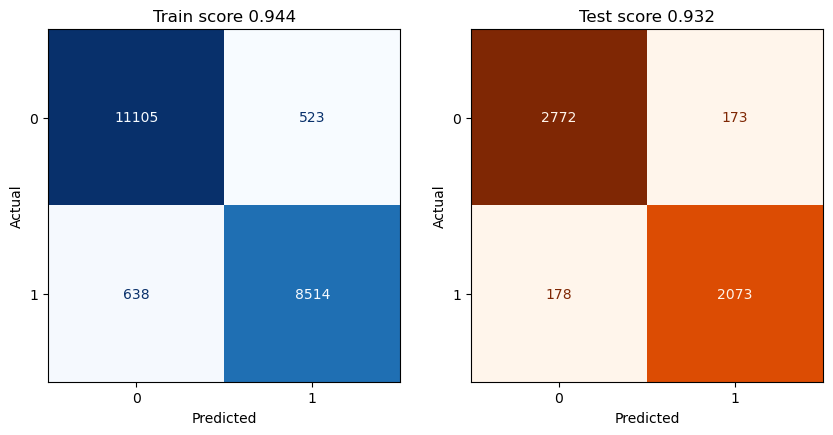

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
disp.plot(cmap= 'Blues', colorbar=False, ax=ax[0])
ax[0].set_title(f'Train score {round(gridRF.score(X_train_final, y_train_enc), 3)}')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp.plot(cmap= 'Oranges', colorbar=False, ax=ax[1])
ax[1].set_title(f'Test score {round(gridRF.score(X_test_final, y_test_enc),3)}')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

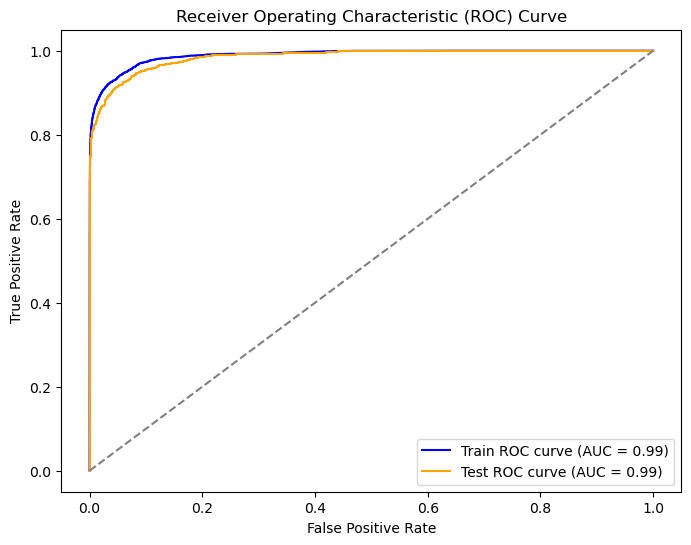

In [53]:
# Membuat prediksi untuk data train dan test
y_score_train = gridRF.best_estimator_.predict_proba(X_train_final)[:, 1]
y_score_test = gridRF.best_estimator_.predict_proba(X_test_final)[:, 1]

# Menghitung nilai ROC-AUC untuk data train dan test
roc_auc_train = roc_auc_score(y_train_enc, y_score_train)
roc_auc_test = roc_auc_score(y_test_enc, y_score_test)

# Menghitung kurva ROC untuk data train dan test
fpr_train, tpr_train, _ = roc_curve(y_train_enc, y_score_train)
fpr_test, tpr_test, _ = roc_curve(y_test_enc, y_score_test)

# Menampilkan kurva ROC-AUC untuk data train dan test
plt.figure(figsize=(8, 6))

# Kurva ROC - Train
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})', color='blue')
# Kurva ROC - Test
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})', color='orange')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis acak (baseline)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [54]:
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predRF))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predRF))

-----------train-------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11628
           1       0.94      0.93      0.94      9152

    accuracy                           0.94     20780
   macro avg       0.94      0.94      0.94     20780
weighted avg       0.94      0.94      0.94     20780

-----------test-------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2945
           1       0.92      0.92      0.92      2251

    accuracy                           0.93      5196
   macro avg       0.93      0.93      0.93      5196
weighted avg       0.93      0.93      0.93      5196

